**Project Goals:**
<br>1. Segment customers based on behavior (purchasing patterns), demographics (customer category, city), and preferences (store type, product types, promotions).<br/>
<br>2. Use clustering techniques (e.g., K-means) to categorize customers into distinct groups.<br/>

**Project Deliverables:**
<br>1. Clustering model to segment customers.<br/>
<br>2. Actionable insights for marketing strategies, customer engagement, and product offerings.<br/>

**Boundaries:**
<br>1. Focus on transactional data to identify customer segments.<br/>
<br>2. Leverage existing features for segmentation without external data.<br/>

**Timeline & Tasks:**
<br>1. Data Preprocessing: Clean and preprocess the data (handling missing values, encoding categorical data).<br/>
<br>2. Feature Engineering: Create new features like average spend, transaction frequency, and preferred store type.<br/>
<br>3. Model Building & Testing: Build and test clustering models.<br/>
<br>4. Insights Generation: Analyze and document key findings.<br/>
<br>5. Project Review & Refinement: Review the model and insights, and make necessary refinements.<br/>

In [3]:
import pandas as pd

# Load the dataset
file_path = '/Users/sabinbasnet/Desktop/Main/Takeo/MachineLearning/Target Customer/Retail_Transactions_Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
(data.head())

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

#We need to convert categorical culumns like payment method, city, store type etc into numerical values.
# Encode categorical features
data['Payment_Method'] = label_encoder.fit_transform(data['Payment_Method'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Store_Type'] = label_encoder.fit_transform(data['Store_Type'])
data['Customer_Category'] = label_encoder.fit_transform(data['Customer_Category'])
data['Season'] = label_encoder.fit_transform(data['Season'])
data['Promotion'] = label_encoder.fit_transform(data['Promotion'])

# Check the encoded data
data.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,3,5,5,True,0,3,2
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,0,8,3,True,2,0,0
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,1,4,1,True,2,3,2
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,3,2,2,True,0,1,2
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,2,4,3,False,7,3,1


In [6]:
from sklearn.preprocessing import StandardScaler

""" Here, We normalize the numerical columns Total_Items and Total_Cost to ensure 
they are on a similar scale, which helps clustering algorithms 
like K-means perform better. """

# Define numerical columns to scale
numerical_features = ['Total_Items', 'Total_Cost']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
data_scaled = scaler.fit_transform(data[numerical_features])

# Check the scaled data
print(pd.DataFrame(data_scaled, columns=numerical_features).head())


   Total_Items  Total_Cost
0    -0.869165    0.700106
1    -1.217397   -0.967474
2     0.175529   -0.399943
3    -1.565628   -0.478361
4     1.568455   -1.314340


In [7]:
from sklearn.cluster import KMeans

#Applying K-means clustering
""" We apply K-means clustering to segment the customers into different groups.
You can adjust the number of clusters (n_clusters) based on the business need."""

# Initialize the K-means model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model on the scaled data and assign cluster labels
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Display the data with assigned clusters
print(data[['Customer_Name', 'Total_Items', 'Total_Cost', 'Cluster']].head())


       Customer_Name  Total_Items  Total_Cost  Cluster
0       Stacey Price            3       71.65        1
1   Michelle Carlson            2       25.93        0
2        Lisa Graves            6       41.49        3
3  Mrs. Patricia May            1       39.34        0
4     Susan Mitchell           10       16.42        3


In [13]:
#Analyze the cluster
#we already assigned the cluster, so analyze each cluster to understand its behavior, purchasing patterns, and preferences.

# Select only the numeric columns for cluster analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Group by clusters and calculate the mean for numeric columns only
cluster_analysis = data.groupby('Cluster')[numeric_columns].mean()

# Display the cluster analysis
print(cluster_analysis)


         Transaction_ID  Total_Items  Total_Cost  Payment_Method      City  \
Cluster                                                                      
0          1.000500e+09     2.996343   28.720929        1.500032  4.511904   
1          1.000500e+09     3.003223   76.218517        1.499092  4.503708   
2          1.000500e+09     7.997520   76.239295        1.499566  4.498188   
3          1.000500e+09     7.998527   28.784016        1.498378  4.490224   

         Store_Type  Customer_Category    Season  Promotion  
Cluster                                                      
0          2.500847           3.499636  1.500971   0.999440  
1          2.503105           3.501192  1.497307   1.003778  
2          2.499807           3.500350  1.499228   1.002584  
3          2.495907           3.495860  1.498094   0.999230  


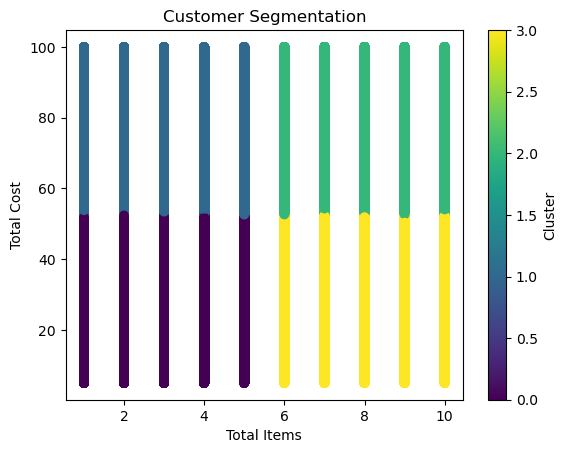

In [14]:
import matplotlib.pyplot as plt
#visualize the clusters

# Scatter plot for visualizing clusters based on Total_Items and Total_Cost
plt.scatter(data['Total_Items'], data['Total_Cost'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Items')
plt.ylabel('Total Cost')
plt.colorbar(label='Cluster')
plt.show()


AttributeError: 'numpy.int32' object has no attribute 'startswith'

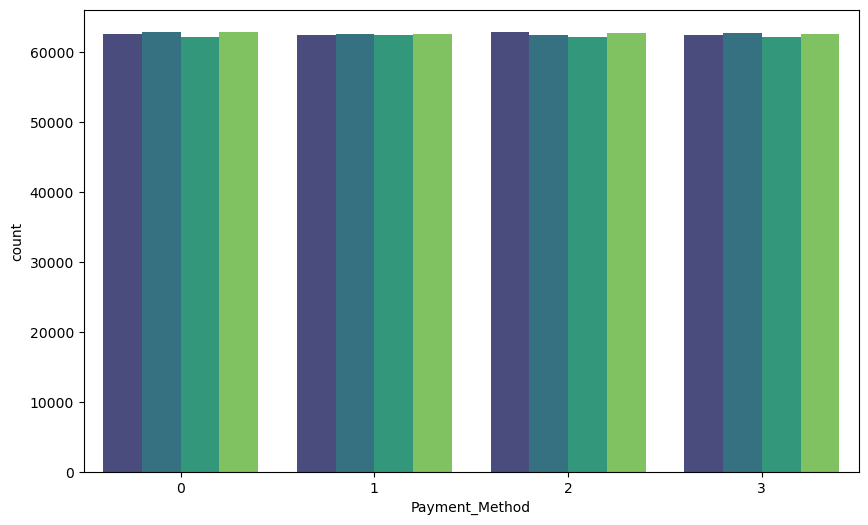

In [16]:
# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of payment methods across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', hue='Cluster', data=data, palette='viridis')
plt.title('Distribution of Payment Methods Across Clusters')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()